 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [104]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [105]:
#paths
whale_path=Path.cwd()/'Resources'/'whale_returns.csv'
algo_path= Path.cwd()/'Resources'/'algo_returns.csv'
sp_path= Path.cwd()/'Resources'/'sp500_history.csv'

In [106]:
# Reading whale returns
whale_df=pd.read_csv(whale_path)


In [107]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [108]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [109]:
# Reading algorithmic returns
algo_df=pd.read_csv(algo_path)

In [110]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [111]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [112]:
# Reading S&P 500 Closing Prices
sp_df=pd.read_csv(sp_path)
sp_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [113]:
# Check Data Types
sp_df.dtypes

Date     object
Close    object
dtype: object

In [114]:
# Fix Data Types
#replace every instance of $ sign with nothing
sp_df['Close']=sp_df['Close'].str.replace('$','')

#cast the Close column values as float 
sp_df['Close']=sp_df["Close"].astype('float')

#check the data type of the column
sp_df['Close'].dtype



dtype('float64')

In [115]:
# Calculate Daily Returns
#change the index to the date index
sp_df.set_index(pd.to_datetime(sp_df['Date'],infer_datetime_format=True),inplace=True)

In [116]:
#sort index in order to perform percent change operation
sp_df.sort_index()

#drop the date column
sp_df.drop(columns=['Date'],inplace=True)

In [117]:
#calculate daily return
sp_daily_return=sp_df.pct_change()
sp_daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [118]:
# Drop nulls
sp_daily_return.dropna(inplace=True)
sp_daily_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [119]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_return.rename(columns={"Close":"Sp500"},inplace=True)
sp_daily_return.columns

Index(['Sp500'], dtype='object')

In [120]:
#set indeces

whale_df.set_index(pd.to_datetime(whale_df['Date'],infer_datetime_format=True),inplace=True)
algo_df.set_index(pd.to_datetime(algo_df['Date'],infer_datetime_format=True),inplace=True)


## Combine Whale, Algorithmic, and S&P 500 Returns

In [121]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

#concatenate using concat function from pandas library
combined_returns=pd.concat([whale_df,algo_df,sp_daily_return],axis='columns',join='inner')

combined_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Sp500
Date,,,,,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2015-03-03,-0.001942,-0.000949,0.004408
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2015-03-04,-0.008589,0.002416,-0.001195
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726,2015-03-05,-0.000955,0.004323,0.014378
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2015-03-06,-0.004957,-0.011460,-0.003929
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2015-03-09,-0.005447,0.001303,0.017254


In [122]:
#drop the date column
combined_returns.drop(columns=['Date'],inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

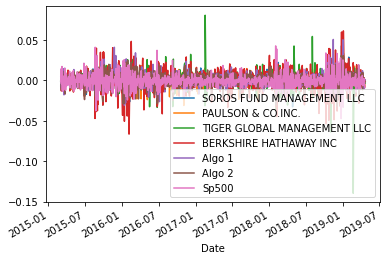

In [123]:
# Plot daily returns of all portfolios
combined_returns.plot()


#### Calculate and Plot cumulative returns.

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'Sp500'],
      dtype='object')


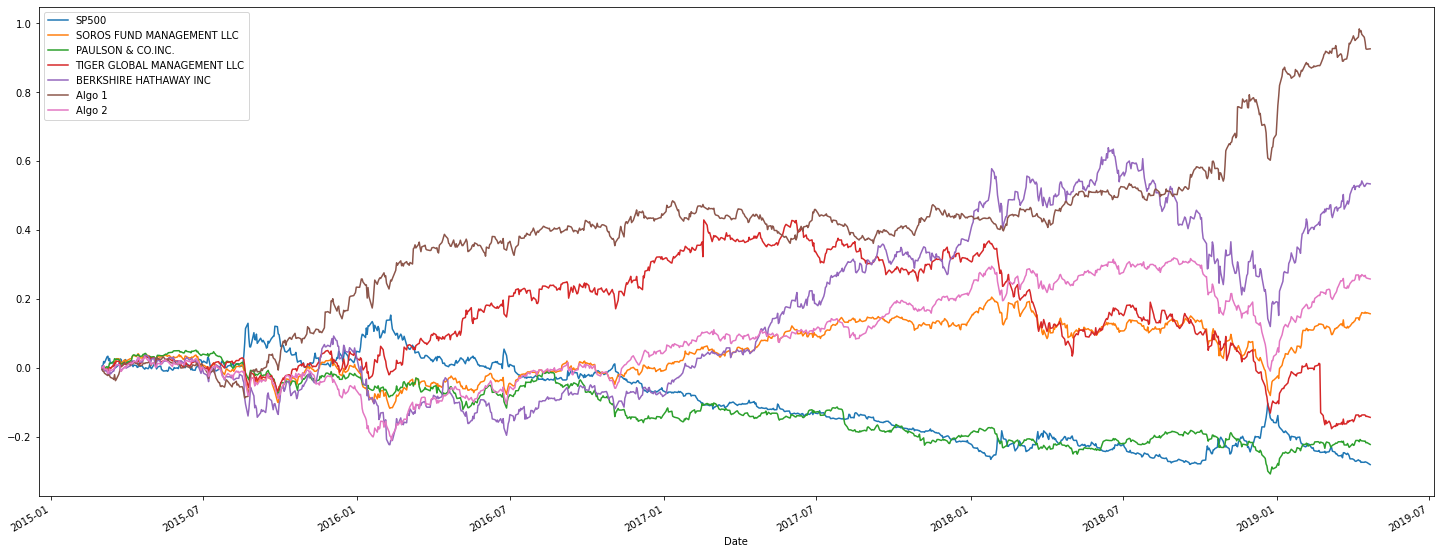

In [124]:
# Calculate cumulative returns of all portfolios
print(combined_returns.columns)
soros_cumul=(1+combined_returns.loc[:,'SOROS FUND MANAGEMENT LLC']).cumprod()-1
paulson_cumul=(1+combined_returns.loc[:,'PAULSON & CO.INC. ']).cumprod()-1
tiger_cumul=(1+combined_returns.loc[:,'TIGER GLOBAL MANAGEMENT LLC']).cumprod()-1
BRK_cumul=(1+combined_returns.loc[:,'BERKSHIRE HATHAWAY INC']).cumprod()-1
Algo1_cumul=(1+combined_returns.loc[:,'Algo 1']).cumprod()-1
Algo2_cumul=(1+combined_returns.loc[:,'Algo 2']).cumprod()-1
sp500_cumul=(1+combined_returns.loc[:,'Sp500']).cumprod()-1

# Plot cumulative returns
ax=sp500_cumul.plot(figsize=(25,10))
soros_cumul.plot(ax=ax)
paulson_cumul.plot(ax=ax)
tiger_cumul.plot(ax=ax)
BRK_cumul.plot(ax=ax)
Algo1_cumul.plot(ax=ax)
Algo2_cumul.plot(ax=ax)

ax.legend(['SP500','SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 
       'Algo 1', 'Algo 2'])


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

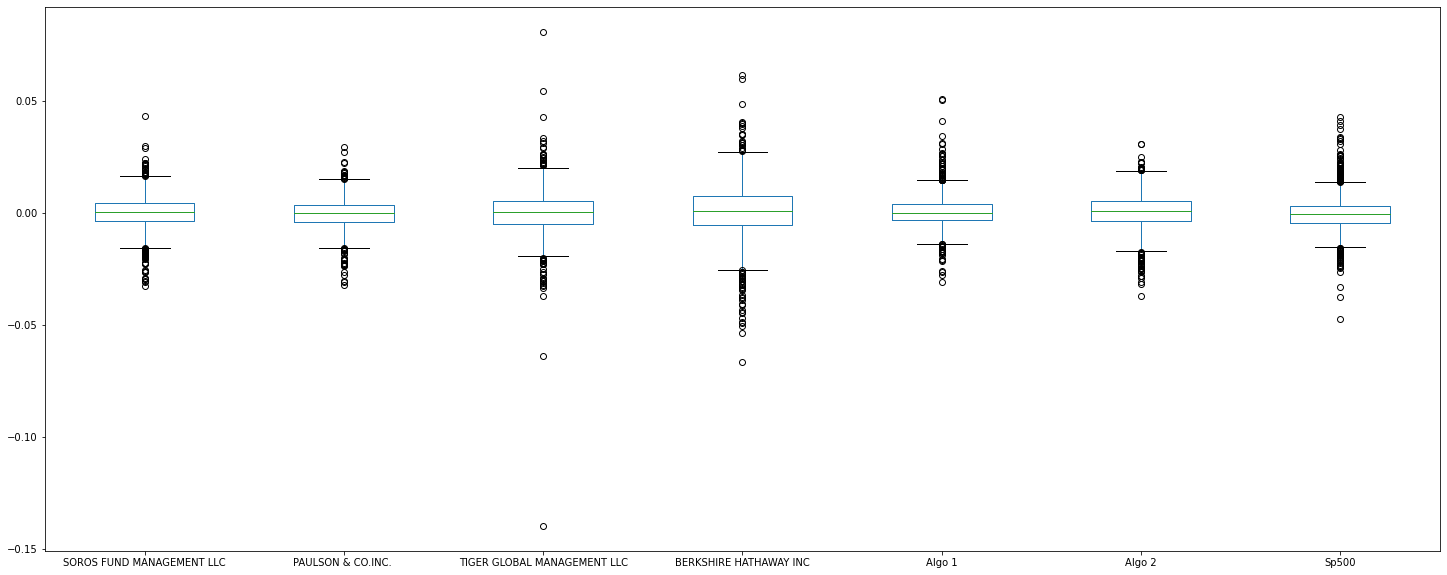

In [125]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(25,10))

### Calculate Standard Deviations

In [126]:
# Calculate the daily standard deviations of all portfolios
combined_std=combined_returns.std()

### Determine which portfolios are riskier than the S&P 500

In [127]:
# Calculate  the daily standard deviation of S&P 500
Sp500_std=combined_returns.loc[:,'Sp500'].std()
# Determine which portfolios are riskier than the S&P 500
first_portfolio=combined_std.loc[combined_std>Sp500_std].index[0]
second_portfolio=combined_std.loc[combined_std>Sp500_std].index[1]
print(f'the portololios are {first_portfolio} and {second_portfolio}')

the portololios are TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC


### Calculate the Annualized Standard Deviation

In [128]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std=combined_std*np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

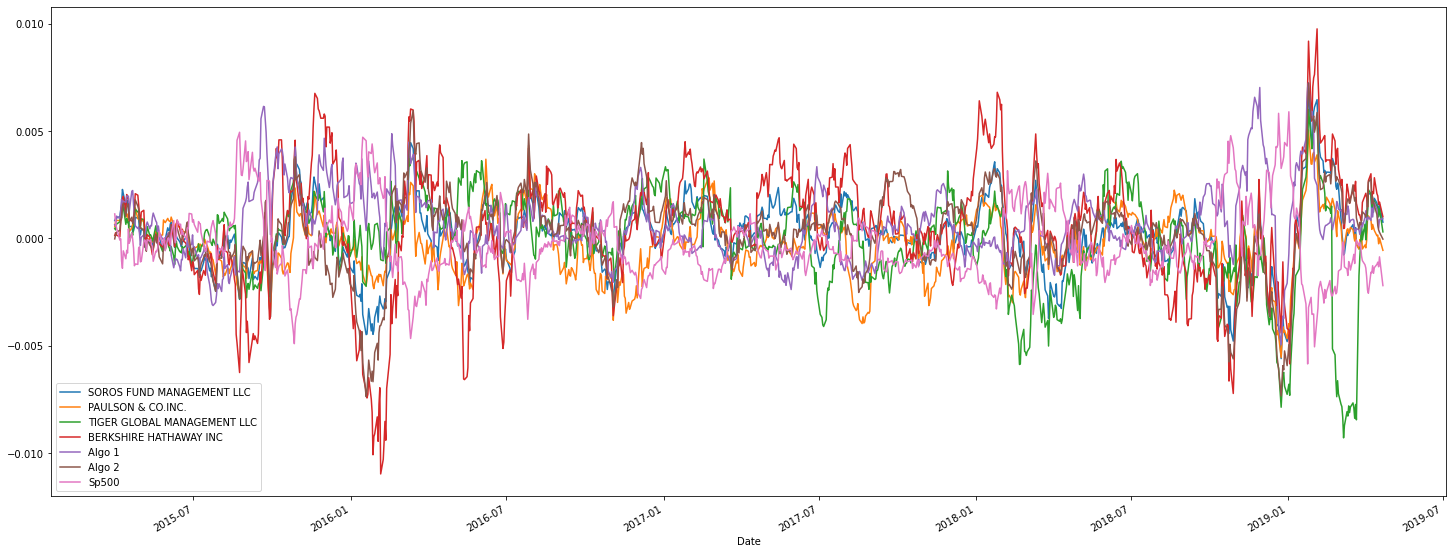

In [129]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_sma_21=combined_returns.rolling(window=21).mean()


# Plot the rolling standard deviation
combined_sma_21.plot(figsize=(25,10))

### Calculate and plot the correlation

In [130]:
# Calculate the correlation
combined_corr=combined_returns.corr()
# Display de correlation matrix
combined_corr


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


the most appropriate portfolio is algo 1


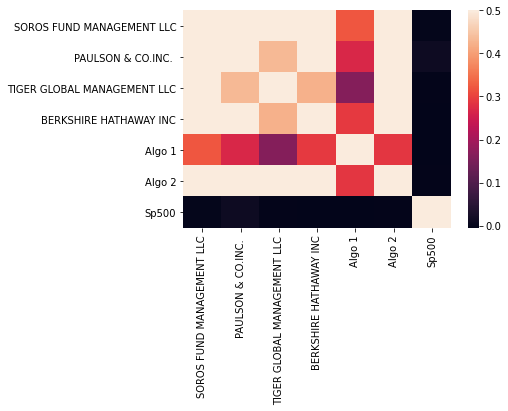

In [131]:
sns.heatmap(combined_corr,vmin=-.005,vmax=.5)
print(f'the most appropriate portfolio is algo 1')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

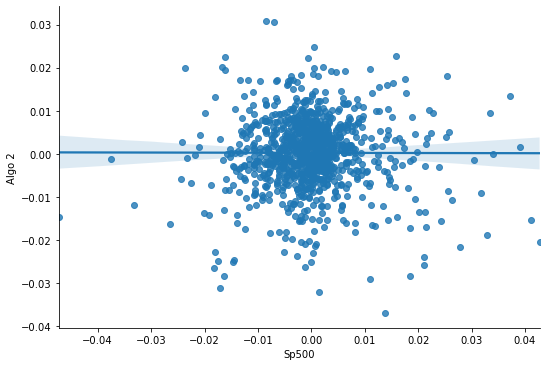

In [132]:
# Calculate covariance of a single portfolio
covariance= combined_returns['Algo 2'].cov(combined_returns['Sp500'])
# Calculate variance of S&P 500
variance=combined_returns['Algo 2'].var()
# Computing beta
beta=covariance/variance
beta
# Plot beta trend
sns.lmplot(x='Sp500',y='Algo 2',data=combined_returns,aspect=1.5,fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [133]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [134]:
# Annualized Sharpe Ratios
sharpe_ratios=(combined_returns.mean()*252)/(combined_std*np.sqrt(252))

Algo 1                    1.369589
BERKSHIRE HATHAWAY INC    0.606743
Algo 2                    0.484334
dtype: float64

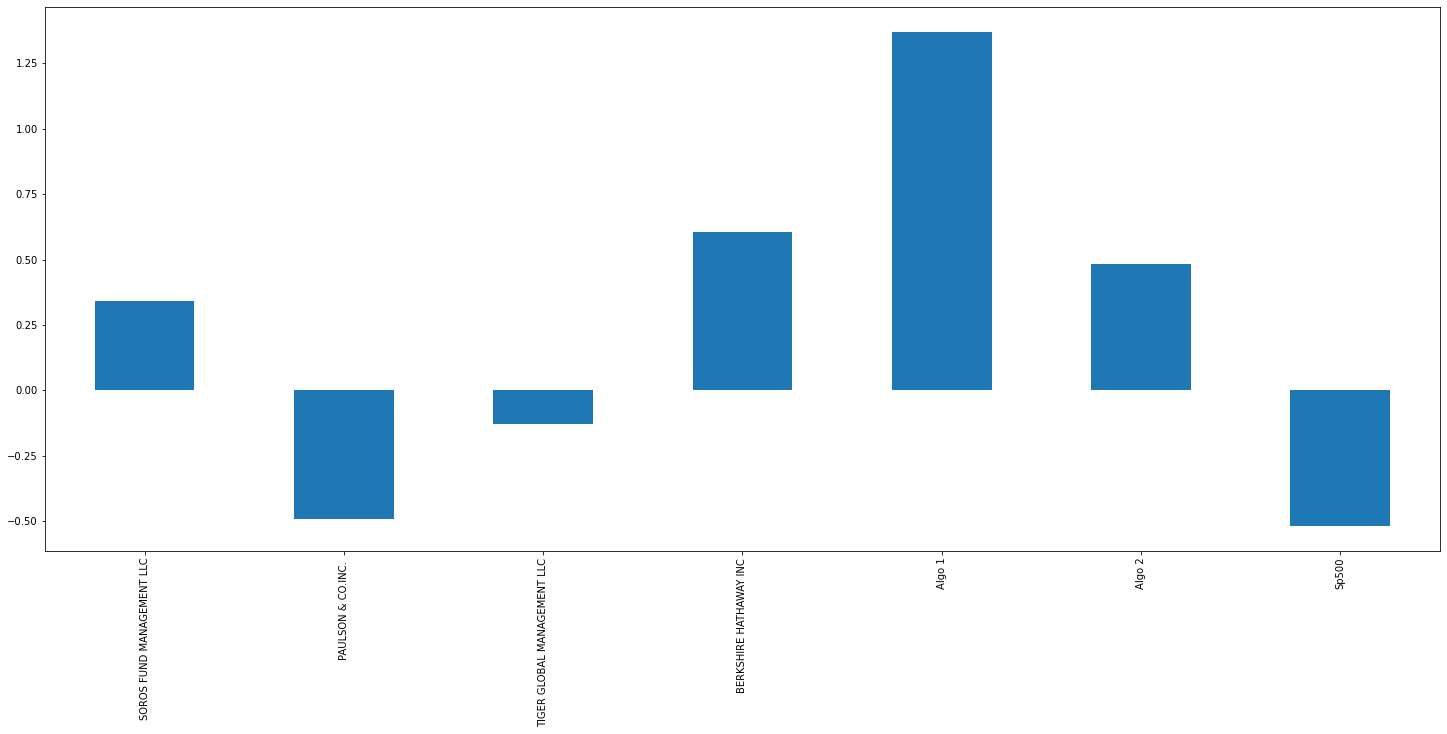

In [135]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(25,10))

sharpe_ratios.sort_values(ascending=False).head(3)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [136]:
print(f'Algo1 all other portfolios where Algo 2 outperform all but berkshire portfolio ')

Algo1 all other portfolios where Algo 2 outperform all but berkshire portfolio 


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [137]:
goog_path= Path.cwd()/'Resources'/'goog_historical.csv'
aapl_path= Path.cwd()/'Resources'/'aapl_historical.csv'
cost_path= Path.cwd()/'Resources'/'cost_historical.csv'

In [138]:
# Reading data from 1st stock
goog_df=pd.read_csv(goog_path)
goog_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [139]:
# Reading data from 2nd stock
aapl_df=pd.read_csv(aapl_path)
aapl_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [140]:
# Reading data from 3rd stock
cost_df=pd.read_csv(cost_path)
cost_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [142]:
# Combine all stocks in a single DataFrame
stocks_combined=pd.concat([goog_df,aapl_df,cost_df],axis='rows',join ='inner')
stocks_combined

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
245,COST,5/17/2018,199.60
246,COST,5/16/2018,198.71
247,COST,5/15/2018,195.48
248,COST,5/14/2018,195.88


In [143]:
# Reset Date index
stocks_combined.set_index(pd.to_datetime(stocks_combined['Trade DATE'],infer_datetime_format=True),inplace=True)
stocks_combined.drop(columns=['Trade DATE'],inplace=True)


In [144]:
stocks_combined

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [145]:
# Reorganize portfolio data by having a column per symbol
pivoted_stocks=stocks_combined.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol")

In [149]:
# Calculate daily returns
s_daily_returns=pivoted_stocks.pct_change()

# Drop NAs
s_daily_returns.dropna(inplace=True)

# Display sample data
s_daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Trade DATE'>

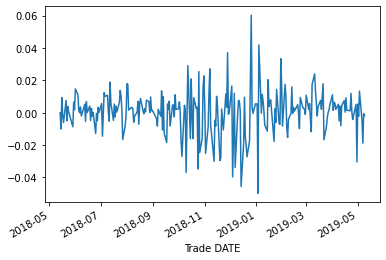

In [152]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns=s_daily_returns.dot(weights)
# Display sample data
portfolio_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [155]:
# Join your returns DataFrame to the original returns DataFrame
s_daily_returns['portfolio']=portfolio_returns
s_daily_returns.head()

Symbol,AAPL,COST,GOOG,portfolio
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061


In [157]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
s_daily_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [159]:
# Calculate the annualized `std`
annualized_std=s_daily_returns.std()*np.sqrt(252)
annualized_std

Symbol
AAPL         0.296955
COST         0.209320
GOOG         0.263554
portfolio    0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

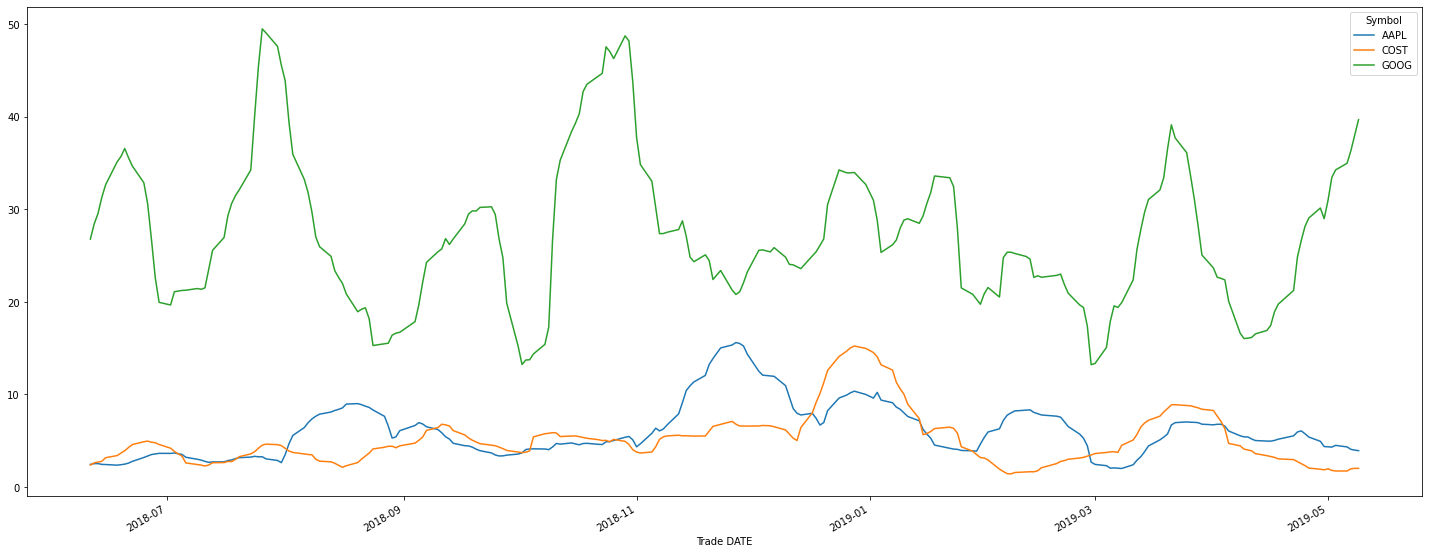

In [162]:
# Calculate rolling standard deviation
rolling_std=zom.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(25,10))

### Calculate and plot the correlation

Symbol,AAPL,COST,GOOG
Symbol,,,
AAPL,1.000000,0.575554,0.544820
COST,0.575554,1.000000,0.523334
GOOG,0.544820,0.523334,1.000000


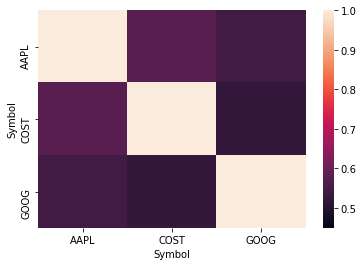

In [177]:
# Calculate and plot the correlation
stocks_corr=pivoted_stocks.corr()
sns.heatmap(stocks_corr, vmin=.45, vmax=1)
stocks_corr

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [179]:
# Calculate and plot Beta
pivoted_stocks

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [182]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios=(s_daily_returns.mean()*252)/(annualized_std*np.sqrt(252))
sharpe

AAPL     NaN
Algo 1   NaN
Algo 2   NaN
dtype: float64

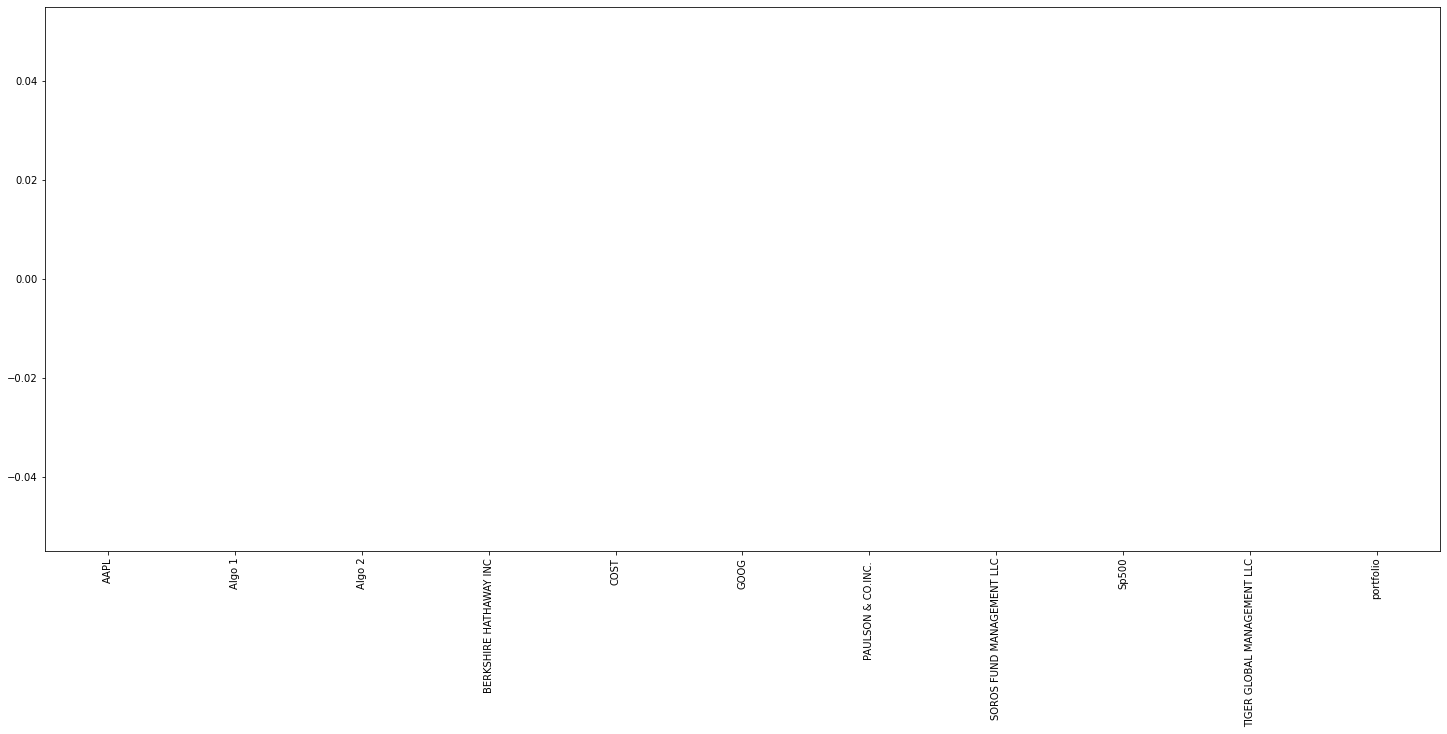

In [183]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(25,10))

sharpe_ratios.sort_values(ascending=False).head(3)

### How does your portfolio do?

Write your answer here!